# Capstone Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv("2014allcntyindage.csv")
df1 = pd.read_csv("2014allcntymigtot.csv")
df2 = pd.read_csv("statewide_reservoir_data.csv")
df3 = pd.read_csv("recent-conditions.csv")
df4 = pd.read_csv("Texas_Evaporation_Data.csv")
df5 = pd.read_csv("Big_Five_Monthly_Stats.csv")

In [26]:
df.head()

,migration_scenario_num,migration_scenario_char,year,FIPS,county_name,age_in_yrs_num,age_in_yrs_char,total,total_male,total_female,...,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
0,0.0,0.0 Scen,2010,0,State of Texas,-1,All Ages,25145561,12472280,12673281,...,5764699,2886825,1392410,1494415,9460921,4763753,4697168,1400470,683471,716999
1,0.0,0.0 Scen,2010,0,State of Texas,0,< 1 yr,379846,193489,186357,...,57695,41869,21109,20760,194215,98489,95726,24874,12698,12176
2,0.0,0.0 Scen,2010,0,State of Texas,1,1 yr,381345,194442,186903,...,58738,42664,21614,21050,193805,98784,95021,24665,12571,12094
3,0.0,0.0 Scen,2010,0,State of Texas,2,2 yrs,390119,199274,190845,...,59885,43834,22307,21527,197746,100851,96895,25634,13096,12538
4,0.0,0.0 Scen,2010,0,State of Texas,3,3 yrs,390262,199391,190871,...,60431,44242,22703,21539,197114,100382,96732,24779,12610,12169


In [27]:
df.tail()

,migration_scenario_num,migration_scenario_char,year,FIPS,county_name,age_in_yrs_num,age_in_yrs_char,total,total_male,total_female,...,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
2728750,1.0,1.0 Scen,2050,507,Zavala County,81,81 yrs,82,39,43,...,4,1,1,0,75,36,39,0,0,0
2728751,1.0,1.0 Scen,2050,507,Zavala County,82,82 yrs,85,36,49,...,1,0,0,0,81,33,48,0,0,0
2728752,1.0,1.0 Scen,2050,507,Zavala County,83,83 yrs,81,43,38,...,2,0,0,0,74,38,36,0,0,0
2728753,1.0,1.0 Scen,2050,507,Zavala County,84,84 yrs,71,34,37,...,2,1,0,1,67,33,34,0,0,0
2728754,1.0,1.0 Scen,2050,507,Zavala County,85,85+ yrs,537,247,290,...,17,3,2,1,492,222,270,5,3,2


In [28]:
df.shape

(2728755, 22)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728755 entries, 0 to 2728754
Data columns (total 22 columns):
migration_scenario_num     float64
migration_scenario_char    object
year                       int64
FIPS                       int64
county_name                object
age_in_yrs_num             int64
age_in_yrs_char            object
total                      int64
total_male                 int64
total_female               int64
total_anglo                int64
anglo_male                 int64
anglo_female               int64
total_black                int64
black_male                 int64
black_female               int64
total_hispanic             int64
hispanic_male              int64
hispanic_female            int64
total_other                int64
other_male                 int64
other_female               int64
dtypes: float64(1), int64(18), object(3)
memory usage: 458.0+ MB


In [30]:
df.describe()

,migration_scenario_num,year,FIPS,age_in_yrs_num,total,total_male,total_female,total_anglo,anglo_male,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
count,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06,2.728755e+06
mean,5.000000e-01,2.030000e+03,2.530039e+02,4.200000e+01,5.976246e+03,2.983239e+03,2.993007e+03,2.095808e+03,1.038967e+03,1.056842e+03,6.466405e+02,3.148249e+02,3.318156e+02,2.763380e+03,1.397735e+03,1.365645e+03,4.704171e+02,2.317121e+02,2.387051e+02
std,4.082484e-01,1.183216e+01,1.472165e+02,2.511308e+01,2.345513e+05,1.172118e+05,1.173479e+05,7.990594e+04,3.960710e+04,4.030260e+04,2.577166e+04,1.252903e+04,1.324474e+04,1.119413e+05,5.671652e+04,5.522914e+04,2.079934e+04,1.027009e+04,1.053040e+04
min,0.000000e+00,2.010000e+03,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.020000e+03,1.250000e+02,2.000000e+01,8.200000e+01,4.200000e+01,4.000000e+01,3.200000e+01,1.700000e+01,1.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,1.100000e+01,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e-01,2.030000e+03,2.530000e+02,4.200000e+01,2.340000e+02,1.200000e+02,1.120000e+02,1.120000e+02,5.700000e+01,5.500000e+01,7.000000e+00,4.000000e+00,3.000000e+00,7.100000e+01,3.700000e+01,3.400000e+01,4.000000e+00,2.000000e+00,2.000000e+00
75%,1.000000e+00,2.040000e+03,3.810000e+02,6.400000e+01,7.060000e+02,3.570000e+02,3.470000e+02,3.720000e+02,1.850000e+02,1.860000e+02,5.000000e+01,2.600000e+01,2.300000e+01,2.420000e+02,1.260000e+02,1.160000e+02,2.000000e+01,1.000000e+01,1.000000e+01
max,1.000000e+00,2.050000e+03,5.070000e+02,8.500000e+01,5.436930e+07,2.743630e+07,2.693300e+07,1.219254e+07,6.051038e+06,6.142498e+06,5.097826e+06,2.509436e+06,2.588390e+06,2.985901e+07,1.524561e+07,1.461340e+07,7.457844e+06,3.709957e+06,3.747887e+06


In [31]:
df.dtypes

migration_scenario_num     float64
migration_scenario_char     object
year                         int64
FIPS                         int64
county_name                 object
age_in_yrs_num               int64
age_in_yrs_char             object
total                        int64
total_male                   int64
total_female                 int64
total_anglo                  int64
anglo_male                   int64
anglo_female                 int64
total_black                  int64
black_male                   int64
black_female                 int64
total_hispanic               int64
hispanic_male                int64
hispanic_female              int64
total_other                  int64
other_male                   int64
other_female                 int64
dtype: object

In [12]:
df1.head()

,migration_scenario,year,FIPS,county_name,total,total_male,total_female,total_anglo,anglo_male,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
0,0.0 Scen,2010,0,State of Texas,25145561,12472280,12673281,11397345,5632646,5764699,2886825,1392410,1494415,9460921,4763753,4697168,1400470,683471,716999
1,0.0 Scen,2011,0,State of Texas,25368140,12585625,12782515,11420275,5645286,5774989,2910041,1404354,1505687,9619067,4843289,4775778,1418757,692696,726061
2,0.0 Scen,2012,0,State of Texas,25587758,12697271,12890487,11441256,5656784,5784472,2932774,1416022,1516752,9777086,4922743,4854343,1436642,701722,734920
3,0.0 Scen,2013,0,State of Texas,25804803,12807402,12997401,11460467,5667195,5793272,2955154,1427500,1527654,9935099,5002176,4932923,1454083,710531,743552
4,0.0 Scen,2014,0,State of Texas,26018996,12915931,13103065,11477791,5676531,5801260,2977005,1438688,1538317,10093070,5081594,5011476,1471130,719118,752012


In [32]:
df1.tail()

,migration_scenario,year,FIPS,county_name,total,total_male,total_female,total_anglo,anglo_male,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
31360,1.0 Scen,2046,507,Zavala County,14566,7634,6932,504,273,231,40,22,18,13991,7324,6667,31,15,16
31361,1.0 Scen,2047,507,Zavala County,14566,7645,6921,495,268,227,39,22,17,14005,7343,6662,27,12,15
31362,1.0 Scen,2048,507,Zavala County,14572,7663,6909,490,265,225,37,20,17,14016,7366,6650,29,12,17
31363,1.0 Scen,2049,507,Zavala County,14567,7665,6902,487,263,224,36,19,17,14017,7371,6646,27,12,15
31364,1.0 Scen,2050,507,Zavala County,14552,7671,6881,479,260,219,35,19,16,14013,7381,6632,25,11,14


In [33]:
df1.shape

(31365, 19)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31365 entries, 0 to 31364
Data columns (total 19 columns):
migration_scenario    31365 non-null object
year                  31365 non-null int64
FIPS                  31365 non-null int64
county_name           31365 non-null object
total                 31365 non-null int64
total_male            31365 non-null int64
total_female          31365 non-null int64
total_anglo           31365 non-null int64
anglo_male            31365 non-null int64
anglo_female          31365 non-null int64
total_black           31365 non-null int64
black_male            31365 non-null int64
black_female          31365 non-null int64
total_hispanic        31365 non-null int64
hispanic_male         31365 non-null int64
hispanic_female       31365 non-null int64
total_other           31365 non-null int64
other_male            31365 non-null int64
other_female          31365 non-null int64
dtypes: int64(17), object(2)
memory usage: 4.5+ MB


In [35]:
df1.describe()

,year,FIPS,total,total_male,total_female,total_anglo,anglo_male,anglo_female,total_black,black_male,black_female,total_hispanic,hispanic_male,hispanic_female,total_other,other_male,other_female
count,31365.000000,31365.000000,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04,3.136500e+04
mean,2030.000000,253.003922,2.599667e+05,1.297709e+05,1.301958e+05,9.116767e+04,4.519505e+04,4.597262e+04,2.812886e+04,1.369488e+04,1.443398e+04,1.202070e+05,6.080149e+04,5.940555e+04,2.046315e+04,1.007947e+04,1.038367e+04
std,11.832348,147.218781,2.159332e+06,1.079053e+06,1.080318e+06,7.352259e+05,3.644855e+05,3.707527e+05,2.373066e+05,1.153553e+05,1.219643e+05,1.030601e+06,5.221161e+05,5.085135e+05,1.917135e+05,9.466003e+04,9.705985e+04
min,2010.000000,0.000000,4.000000e+01,2.000000e+01,2.000000e+01,2.100000e+01,1.000000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,8.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,2020.000000,125.000000,7.564000e+03,4.053000e+03,3.627000e+03,2.906000e+03,1.483000e+03,1.420000e+03,8.900000e+01,5.200000e+01,3.200000e+01,2.336000e+03,1.278000e+03,1.035000e+03,1.050000e+02,5.200000e+01,5.200000e+01
50%,2030.000000,253.000000,2.056900e+04,1.061100e+04,9.880000e+03,9.595000e+03,4.916000e+03,4.695000e+03,6.740000e+02,4.290000e+02,2.340000e+02,6.762000e+03,3.565000e+03,3.184000e+03,4.220000e+02,2.110000e+02,2.080000e+02
75%,2040.000000,381.000000,5.976300e+04,3.011500e+04,2.897300e+04,3.196500e+04,1.570700e+04,1.597500e+04,4.224000e+03,2.196000e+03,2.030000e+03,2.033800e+04,1.062200e+04,9.781000e+03,1.735000e+03,8.770000e+02,8.580000e+02
max,2050.000000,507.000000,5.436930e+07,2.743630e+07,2.693300e+07,1.219254e+07,6.051038e+06,6.142498e+06,5.097826e+06,2.509436e+06,2.588390e+06,2.985901e+07,1.524561e+07,1.461340e+07,7.457844e+06,3.709957e+06,3.747887e+06


In [36]:
df1.dtypes

migration_scenario    object
year                   int64
FIPS                   int64
county_name           object
total                  int64
total_male             int64
total_female           int64
total_anglo            int64
anglo_male             int64
anglo_female           int64
total_black            int64
black_male             int64
black_female           int64
total_hispanic         int64
hispanic_male          int64
hispanic_female        int64
total_other            int64
other_male             int64
other_female           int64
dtype: object

In [70]:
df2.head()

,date,reservoir_storage,conservation_storage,percent_full,conservation_capacity
1,2017-09-24,30676386.0,26157328.0,83.2,31440033.0
2,2017-09-25,30614275.0,26126815.0,83.1,31440033.0
3,2017-09-26,30584979.0,26121214.0,83.1,31440033.0
4,2017-09-27,30665762.0,26209212.0,83.4,31440033.0
5,2017-09-28,30773860.0,26317707.0,83.7,31440033.0


In [80]:
df2.shape

(366, 5)

In [59]:
# Removing the first row / index of column labels

df2.drop([0,0], inplace=True)

In [62]:
# Dropping the "Unnamed:5" and "Unnamed:6" columns, because they are all null and not needed

df2.drop("Unnamed: 6", axis=1, inplace=True)

In [63]:
df2.drop("Unnamed: 5", axis=1, inplace=True)

In [65]:
# Renaming columns 

new_columns_list = ['date', 'reservoir_storage', 'conservation_storage',
       'percent_full', 'conservation_capacity']

df2.columns = new_columns_list

In [74]:
df2["date"] = pd.to_datetime(df2["date"])
df2["reservoir_storage"] = df2["reservoir_storage"].astype(float)
df2["conservation_storage"] = df2["conservation_storage"].astype(float)
df2["percent_full"] = df2["percent_full"].astype(float)
df2["conservation_capacity"] = df2["conservation_capacity"].astype(float)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 5 columns):
date                     366 non-null datetime64[ns]
reservoir_storage        366 non-null float64
conservation_storage     366 non-null float64
percent_full             366 non-null float64
conservation_capacity    366 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 17.2 KB


In [76]:
df2.describe()

,reservoir_storage,conservation_storage,percent_full,conservation_capacity
count,3.660000e+02,3.660000e+02,366.000000,3.660000e+02
mean,3.066783e+07,2.564726e+07,81.659836,3.140699e+07
std,1.750907e+06,9.825078e+05,3.139802,6.966163e+04
min,2.734058e+07,2.329879e+07,74.100000,3.131640e+07
25%,2.974831e+07,2.536674e+07,80.700000,3.134763e+07
50%,3.065905e+07,2.572929e+07,82.100000,3.144003e+07
75%,3.129487e+07,2.642974e+07,84.075000,3.144003e+07
max,3.478023e+07,2.701205e+07,85.800000,3.153542e+07


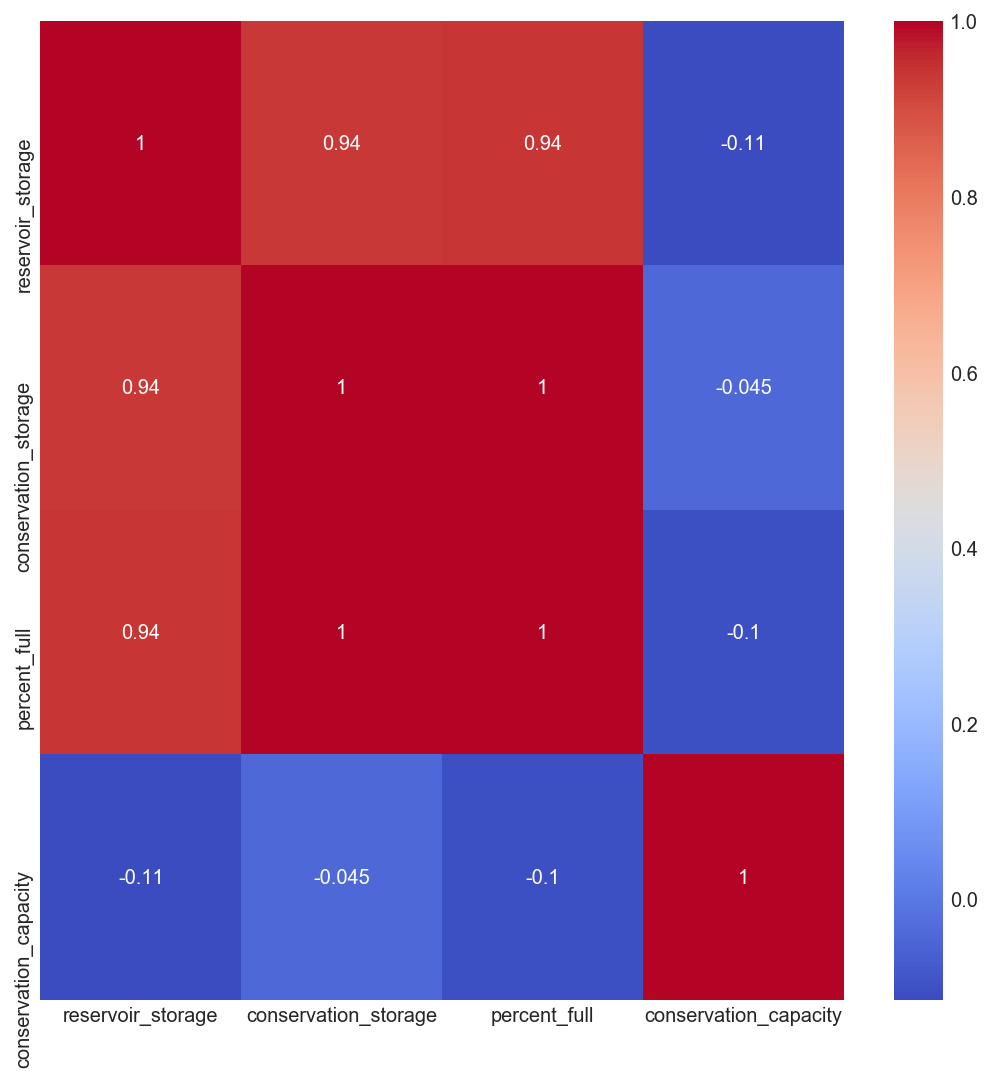

In [94]:
plt.figure(figsize=(9,9))
sns.heatmap(df2.corr(), cmap="coolwarm", annot=True);

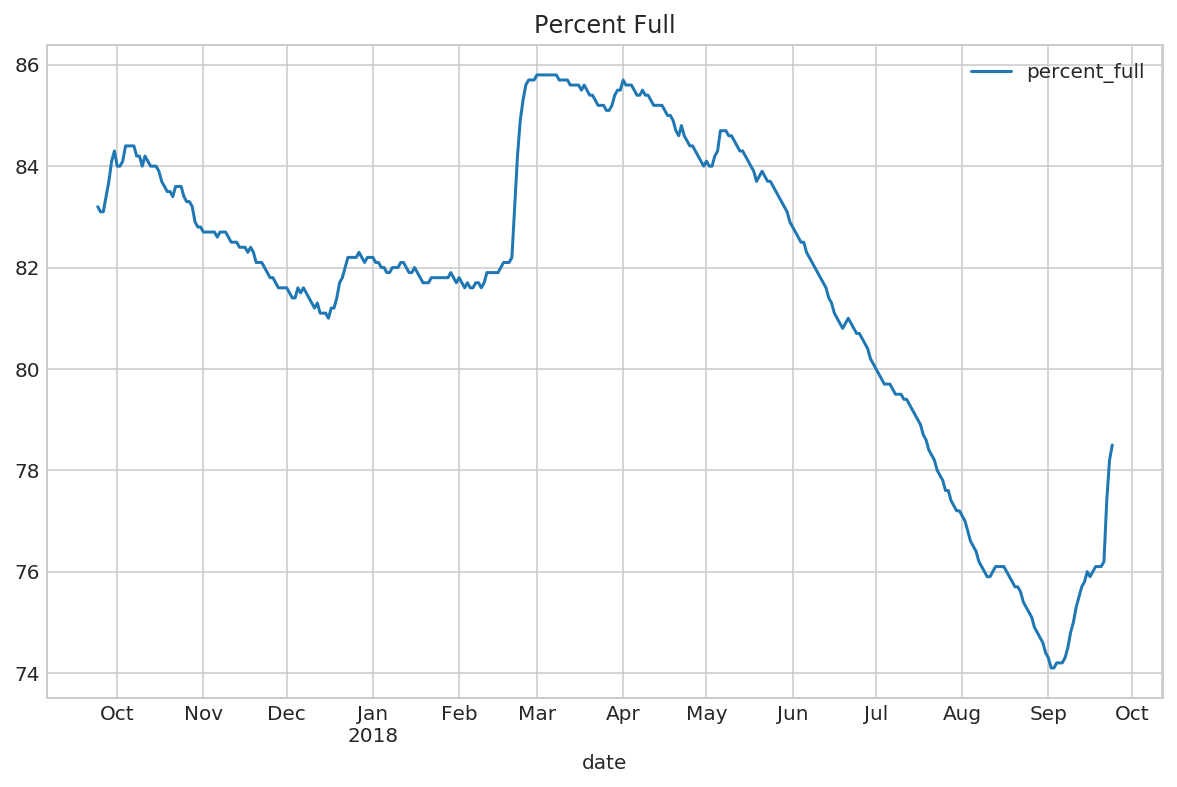

In [79]:
df2.plot(title = "Percent Full", kind="line", x="date", y="percent_full", figsize=(10,6));

In [4]:
df3.head()

,condensed_name,short_name,full_name,timestamp,tags,gauge_location,volume,elevation,area,percent_full,conservation_capacity,conservation_storage,conservation_pool_elevation,dead_pool_elevation,volume_under_conservation_pool_elevation
0,Abilene,Abilene,Lake Abilene,2018-09-24,"['climate_low_rolling_plains', 'monitored', 'm...","OrderedDict([('type', 'Point'), ('coordinates'...",3662.0,2003.90,391.00,46.4,7900.0,3662.0,2012.3,1968.8,7.900000e+03
1,Addicks,Addicks,Addicks Reservoir,2018-09-24,"['climate_upper_coast', 'monitored', 'municipa...","OrderedDict([('type', 'Point'), ('coordinates'...",NaN,86.26,NaN,NaN,NaN,NaN,67.5,67.5,NaN
2,AlanHenry,Alan Henry,Lake Alan Henry,2018-09-24,"['climate_low_rolling_plains', 'monitored', 'm...","OrderedDict([('type', 'Point'), ('coordinates'...",74920.0,2212.05,2299.07,79.0,94808.0,74920.0,2220.0,0.0,9.480791e+04
3,Amistad,Amistad,Amistad Reservoir,2018-09-24,"['climate_edwards_plateau', 'monitored', 'muni...","OrderedDict([('type', 'Point'), ('coordinates'...",1586793.0,1083.75,38760.07,61.2,1840849.0,1126632.0,1117.0,930.0,3.275532e+06
4,AmonGCarter,Amon G Carter,Lake Amon G Carter,2018-09-24,"['climate_north_central', 'monitored', 'region...","OrderedDict([('type', 'Point'), ('coordinates'...",18396.0,918.85,1403.00,91.4,19266.0,17612.0,920.0,892.5,2.005000e+04


In [16]:
# Looking at the Evaporation file for the State of Texas
# Avg Evaporation in inches for the State of Texas, 1954 - 2017

df4.head()

,Quad,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,NaN,1954,2.19,3.66,4.05,4.79,4.96,7.62,9.04,8.61,7.38,5.01,3.65,2.98,63.95
1,NaN,1955,2.15,2.22,3.66,5.26,5.60,6.18,6.96,6.68,5.61,6.02,4.17,2.64,57.15
2,NaN,1956,2.46,2.64,4.55,5.11,5.87,7.68,8.77,8.81,7.28,5.45,4.01,2.83,65.46
3,NaN,1957,2.60,2.09,3.28,2.75,3.30,4.96,7.89,7.76,5.23,3.87,1.84,2.27,47.85
4,NaN,1958,2.17,2.25,2.84,3.75,4.53,6.54,7.50,6.88,4.31,3.25,2.59,2.08,48.69


In [23]:
# Dropping the "Quad" column, because it is all null and not needed

df4.drop(columns=["Quad"], inplace=True)

In [24]:
# Checking if the "Quad" column was successfully removed from the DataFrame

df4.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1954,2.19,3.66,4.05,4.79,4.96,7.62,9.04,8.61,7.38,5.01,3.65,2.98,63.95
1,1955,2.15,2.22,3.66,5.26,5.60,6.18,6.96,6.68,5.61,6.02,4.17,2.64,57.15
2,1956,2.46,2.64,4.55,5.11,5.87,7.68,8.77,8.81,7.28,5.45,4.01,2.83,65.46
3,1957,2.60,2.09,3.28,2.75,3.30,4.96,7.89,7.76,5.23,3.87,1.84,2.27,47.85
4,1958,2.17,2.25,2.84,3.75,4.53,6.54,7.50,6.88,4.31,3.25,2.59,2.08,48.69


In [4]:
df4.tail()

,Quad,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual
59,NaN,2013,2.39,3.21,4.22,3.56,5.19,6.27,7.44,6.51,6.48,4.13,2.64,1.47,53.77
60,NaN,2014,2.93,1.57,3.96,5.03,5.30,5.33,6.93,7.99,5.14,4.46,2.99,1.91,53.76
61,NaN,2015,2.15,2.24,2.90,3.56,4.52,5.50,6.73,7.13,5.57,5.29,2.64,1.96,50.18
62,NaN,2016,1.91,3.37,3.86,4.34,4.02,5.63,7.44,6.05,5.68,4.67,3.29,2.56,52.70
63,NaN,2017,2.88,3.14,3.90,4.31,5.23,6.27,7.46,6.39,4.61,4.39,2.98,2.38,54.16


In [25]:
evaporation_avg = df4["Annual"].mean()
evaporation_avg

52.27406250000001

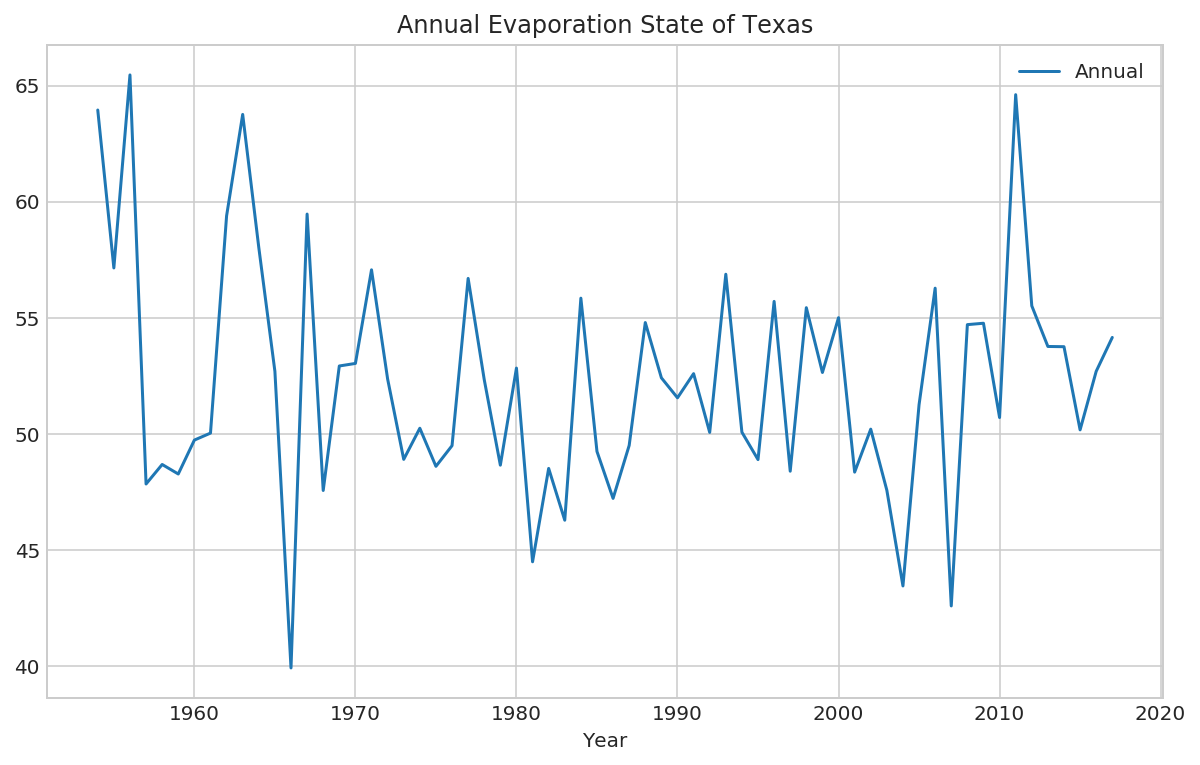

In [81]:
df4.plot(title = "Annual Evaporation State of Texas", kind="line", x="Year", y="Annual", figsize=(10,6));

In [19]:
df5.head()

,Austin,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Average high in °F:,62.0,65.00,72.00,80.00,87.00,92.00,96.00,97.00,91.00,82.0,71.00,63.0
1,Average low in °F:,42.0,45.00,51.00,59.00,67.00,72.00,74.00,75.00,69.00,61.0,51.00,42.0
2,Av. precipitation in inch:,2.2,2.01,2.76,2.09,4.37,4.33,1.89,2.36,2.99,3.9,2.95,2.4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dallas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df5.tail()

,Austin,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
19,San Antonio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Average high in °F:,62.00,67.00,74.00,80.0,86.00,91.00,95.00,95.00,90.00,82.00,71.0,64.00
21,Average low in °F:,39.00,42.00,50.00,57.0,65.00,72.00,74.00,74.00,69.00,59.00,49.0,41.00
22,Av. precipitation in inch:,1.65,1.73,1.89,2.6,4.72,4.29,2.05,2.56,2.99,3.86,2.6,1.97
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
